# Retail Data Wrangling and Analytics

In [1]:
# Import modules 
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# Load Data from PSQL into DataFrame

**Setup Docker Containers**

![](https://i.imgur.com/VQrBVBk.jpg)

```
#make sure you have both Jupyter and PSQL docker container running
docker ps

#Attach a bridge network to both containers so they can communicate with each other
docker network create jarvis-net
#this command works on running containers
docker network connect jarvis-net jrvs-jupyter
docker network connect jarvis-net jrvs-psql

#verify both containers are attached to the jarvis-net
docker network inspect jarvis-net

#Note: instead of using `localhost`, you should use container names as hostnames.
```

**Data Preperation**

- Use [pandas.read_sql](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_sql.html) api to load the PSQL retail table into a Pandas DataFrame

![](https://i.imgur.com/AmkAP63.jpg)

- Get familair with the transaction date with `df.head()`, `df.sample(10)`, `df.info()`, `df.describe()`, etc..



In [2]:
#install psql "driver"
!pip3 install psycopg2-binary

In [3]:
import psycopg2 as pg

engine_string = "dbname='postgres' user='postgres' host='jrvs-psql' password='password'"
engine = pg.connect(engine_string)
retail_df = pd.read_sql_query('SELECT * FROM retail', con=engine)
retail_df.head()

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [4]:
retail_df.info()
retail_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column        Non-Null Count    Dtype         
---  ------        --------------    -----         
 0   invoice_no    1067371 non-null  object        
 1   stock_code    1067371 non-null  object        
 2   description   1062989 non-null  object        
 3   quantity      1067371 non-null  int64         
 4   invoice_date  1067371 non-null  datetime64[ns]
 5   unit_price    1067371 non-null  float64       
 6   customer_id   824364 non-null   float64       
 7   country       1067371 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 65.1+ MB


,quantity,unit_price,customer_id
count,1.067371e+06,1.067371e+06,824364.000000
mean,9.938898e+00,4.649388e+00,15324.638504
std,1.727058e+02,1.235531e+02,1697.464450
min,-8.099500e+04,-5.359440e+04,12346.000000
25%,1.000000e+00,1.250000e+00,13975.000000
50%,3.000000e+00,2.100000e+00,15255.000000
75%,1.000000e+01,4.150000e+00,16797.000000
max,8.099500e+04,3.897000e+04,18287.000000


# Load CSV into Dataframe
Alternatively, the LGS IT team also dumped the transactional data into a [CSV file](https://raw.githubusercontent.com/jarviscanada/jarvis_data_eng_demo/feature/data/python_data_wrangling/data/online_retail_II.csv). However, the CSV header (column names) doesn't follow the snakecase or camelcase naming convention (e.g. `Customer ID` instead of `customer_id` or `CustomerID`). As a result, you will need to use Pandas to clean up the data before doing any analytics. In addition, unlike the PSQL scheme, CSV files do not have data types associated. Therefore, you will need to cast/convert certain columns into correct data types (e.g. DateTime, numbers, etc..)

**Data Preperation**

- Read the `data/online_retail_II.csv` file into a DataFrame
- Rename all columns to upper camelcase or snakecase
- Convert/cast all columns to the appropriate data types (e.g. datetime)

In [5]:
retail_csv_df = pd.read_csv('https://raw.githubusercontent.com/jarviscanada/jarvis_data_eng_demo/feature/data/python_data_wrangling/data/online_retail_II.csv')
retail_csv_df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [6]:
col_names = ["invoice_no", "stock_code", "description", "quantity", "invoice_date", "unit_price", "customer_id", "country"]
retail_csv_df.columns = col_names
retail_csv_df.sample(5)

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,country
766475,558122,21977,PACK OF 60 PINK PAISLEY CAKE CASES,36,2011-06-27 09:35:00,0.55,16570.0,United Kingdom
520021,537678,71053,WHITE METAL LANTERN,24,2010-12-08 09:56:00,3.39,16779.0,United Kingdom
1057143,580959,22114,HOT WATER BOTTLE TEA AND SYMPATHY,4,2011-12-06 14:31:00,4.25,14673.0,United Kingdom
184846,C506987,21735,TWO DOOR CURIO CABINET,-2,2010-05-05 13:29:00,10.95,16131.0,United Kingdom
564843,C539640,21668,RED STRIPE CERAMIC DRAWER KNOB,-1,2010-12-20 15:27:00,1.06,15311.0,United Kingdom


In [7]:
retail_csv_df = retail_csv_df.astype({'invoice_date': 'datetime64'})
retail_csv_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column        Non-Null Count    Dtype         
---  ------        --------------    -----         
 0   invoice_no    1067371 non-null  object        
 1   stock_code    1067371 non-null  object        
 2   description   1062989 non-null  object        
 3   quantity      1067371 non-null  int64         
 4   invoice_date  1067371 non-null  datetime64[ns]
 5   unit_price    1067371 non-null  float64       
 6   customer_id   824364 non-null   float64       
 7   country       1067371 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 65.1+ MB


# Total Invoice Amount Distribution

#### Calculate the invoice amount. Note: an invoice consists of one or more items where each item is a row in the df. (hint: you need to `GROUP BY invoice`)

In [8]:
invoice_line_amount_df = retail_csv_df.copy()
invoice_line_amount_df['line_amount'] = invoice_line_amount_df['unit_price'] * invoice_line_amount_df['quantity']
invoice_amount_df = invoice_line_amount_df.groupby('invoice_no').agg(amount=('line_amount', 'sum'))
invoice_amount_df = invoice_amount_df[invoice_amount_df.amount > 0] # remove invalid invoices
invoice_amount_df.sample(5)

,amount
invoice_no,
549387,483.00
569833,517.28
567880,634.85
572511,454.20
513015,427.91


#### Draw the distribution of invoice amount with min, max, median, mod, and mean. However, you will notice many outlier data (e.g. invoices with large amounts). Sample hist and box charts:

In [9]:
# Create a function that we can re-use
def show_distribution(df):
    # Get statistics
    min_val = df.min()
    max_val = df.max()
    mean_val = df.mean()
    med_val = df.median()
    mod_val = df.mode()[0]

    print('Minimum:{:.2f}\nMean:{:.2f}\nMedian:{:.2f}\nMode:{:.2f}\nMaximum:{:.2f}\n'.format(min_val,
                                                                                            mean_val,
                                                                                            med_val,
                                                                                            mod_val,
                                                                                            max_val))

    # Create a figure for 2 subplots (2 rows, 1 column)
    fig, ax = plt.subplots(2, 1, figsize = (10,4))

    # Plot the histogram   
    ax[0].hist(df)
    ax[0].set_ylabel('Frequency')

    # Add lines for the mean, median, and mode
    ax[0].axvline(x=min_val, color = 'gray', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=mean_val, color = 'cyan', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=med_val, color = 'red', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=mod_val, color = 'yellow', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=max_val, color = 'gray', linestyle='dashed', linewidth = 2)

    # Plot the boxplot   
    ax[1].boxplot(df, vert=False)
    ax[1].set_xlabel('Value')

    # Add a title to the Figure
    fig.suptitle('Data Distribution')

    # Show the figure
    fig.show()
print("Function show_distribution created")

Function show_distribution created


Minimum:0.19
Mean:523.30
Median:304.32
Mode:15.00
Maximum:168469.60



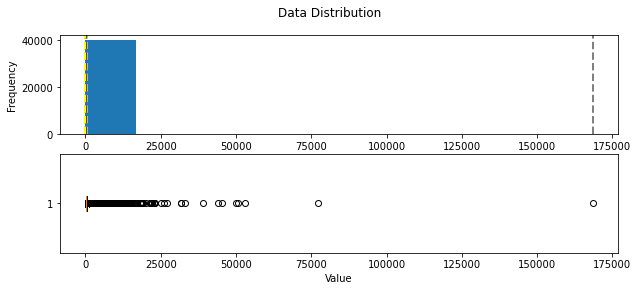

In [10]:
# Get the variable to examine
amount_df = invoice_amount_df['amount']
# Call the function
show_distribution(amount_df)

#### Draw the distribution for the first 85 quantiles of the invoice amount data with min, max, median, mod, and mean.

Minimum:0.19
Mean:271.68
Median:256.24
Mode:15.00
Maximum:724.25



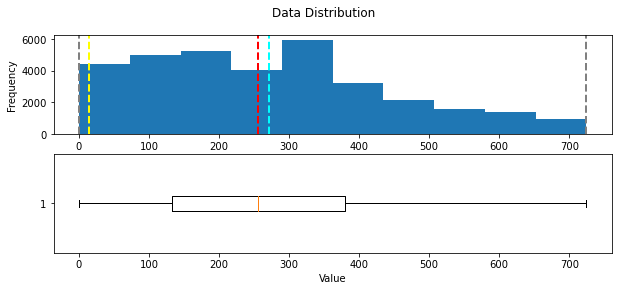

In [11]:
q85 = invoice_amount_df.amount.quantile(0.85)
# Get the variable to examine
remove_outliers = invoice_amount_df[invoice_amount_df.amount<=q85]
# Call the function
show_distribution(remove_outliers['amount'])

# Monthly Placed and Canceled Orders

#### Create a new integer column with YYYYMM format

In [12]:
year_month_df = retail_csv_df.copy()
invoice_year_month  = pd.Series(year_month_df['invoice_date'].dt.strftime('%Y%m'))
year_month_df = pd.concat([year_month_df, invoice_year_month.rename("invoice_year_month")], axis=1)
year_month_df.sample(5)

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,country,invoice_year_month
666307,548470,21578,WOODLAND DESIGN COTTON TOTE BAG,6,2011-03-31 12:36:00,2.25,12782.0,Portugal,201103
783245,559544,22210,WOOD STAMP SET BEST WISHES,1,2011-07-10 13:52:00,0.83,17126.0,United Kingdom,201107
585835,541421,90184B,AMETHYST CHUNKY BEAD BRACELET W STR,2,2011-01-17 17:44:00,9.15,NaN,United Kingdom,201101
424993,530000,21179,NO JUNK MAIL METAL SIGN,1,2010-11-01 09:13:00,3.36,NaN,United Kingdom,201011
164377,504933,82486,WOOD S/3 CABINET ANT WHITE FINISH,2,2010-04-19 11:13:00,16.13,NaN,United Kingdom,201004


#### Add a column to indicate canceled orders

In [13]:
canceled_orders_df = year_month_df[year_month_df['invoice_no'].str.contains('C')]
monthly_canceled_orders_df = (
    canceled_orders_df
        .groupby('invoice_year_month')['invoice_no']
        .nunique()
        .reset_index(name='Cancellation')
)
placed_orders_df = year_month_df[~year_month_df['invoice_no'].str.contains('C')]
monthly_placed_orders_df = (
    placed_orders_df
        .groupby('invoice_year_month')['invoice_no']
        .nunique()
        .reset_index(name='Placement')
)
# Adjust the number of placement according to the cancellations
monthly_placed_orders_df.Placement = monthly_placed_orders_df.Placement - monthly_canceled_orders_df.Cancellation 

print("Placed orders: \n")
display(monthly_placed_orders_df)
print("Canceled orders: \n")
display(monthly_canceled_orders_df)

Placed orders: 



,invoice_year_month,Placement
0,200912,1528
1,201001,1033
2,201002,1489
3,201003,1553
4,201004,1284
5,201005,1604
6,201006,1502
7,201007,1329
8,201008,1331
9,201009,1633


Canceled orders: 



,invoice_year_month,Cancellation
0,200912,401
1,201001,300
2,201002,240
3,201003,407
4,201004,304
5,201005,407
6,201006,357
7,201007,344
8,201008,273
9,201009,371


#### Plot monthly placed and canceled orders

<AxesSubplot:xlabel='invoice_year_month'>

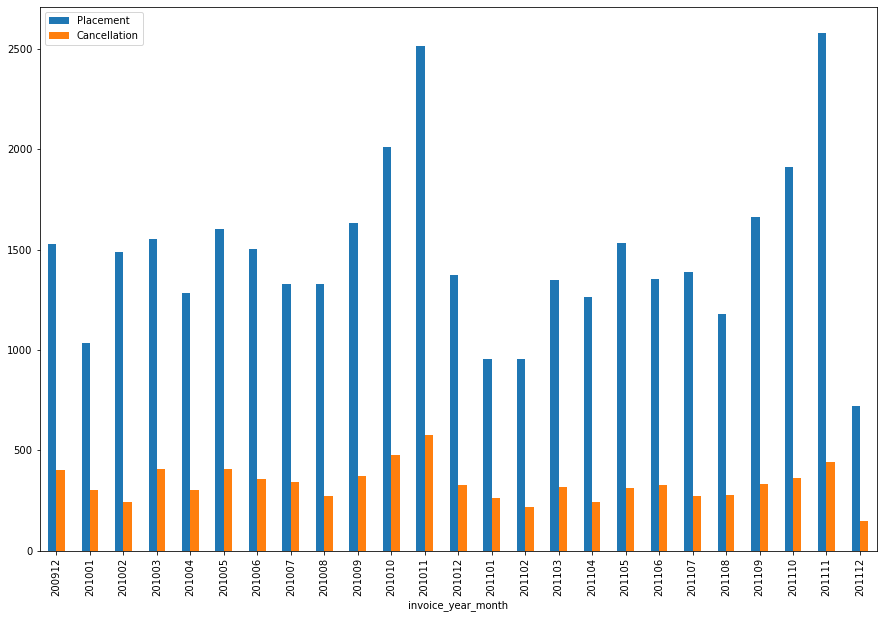

In [14]:
placed_canceled_orders_df = pd.concat([monthly_placed_orders_df, monthly_canceled_orders_df["Cancellation"]], axis=1)
placed_canceled_orders_df.plot(x="invoice_year_month", y=['Placement', 'Cancellation'], kind='bar', figsize=(15,10))

# Monthly Sales

In [15]:
year_month_line_amount_df = pd.concat([year_month_df, invoice_line_amount_df['line_amount']], axis=1)
year_month_line_amount_df.sample(5)

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,country,invoice_year_month,line_amount
910966,C570203,21530,DAIRY MAID TOASTRACK,-1,2011-10-07 16:49:00,0.79,15311.0,United Kingdom,201110,-0.79
760943,557640,21484,CHICK GREY HOT WATER BOTTLE,1,2011-06-21 16:24:00,8.29,NaN,United Kingdom,201106,8.29
599504,542399,21485,RETROSPOT HEART HOT WATER BOTTLE,3,2011-01-27 15:38:00,4.95,15549.0,United Kingdom,201101,14.85
257372,514277,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-07-01 11:37:00,2.95,16190.0,United Kingdom,201007,17.70
101483,499011,84839,SWEETHEART KEY CABINET,4,2010-02-24 12:06:00,6.75,14284.0,United Kingdom,201002,27.00


In [16]:
monthly_sales_df = (
    year_month_line_amount_df
        .groupby("invoice_year_month")["line_amount"]
        .sum()
        .reset_index()
        .sort_values("invoice_year_month")
        .rename(columns={'line_amount': 'sales'})
)
monthly_sales_df.head()

,invoice_year_month,sales
0,200912,799847.110
1,201001,624032.892
2,201002,533091.426
3,201003,765848.761
4,201004,590580.432


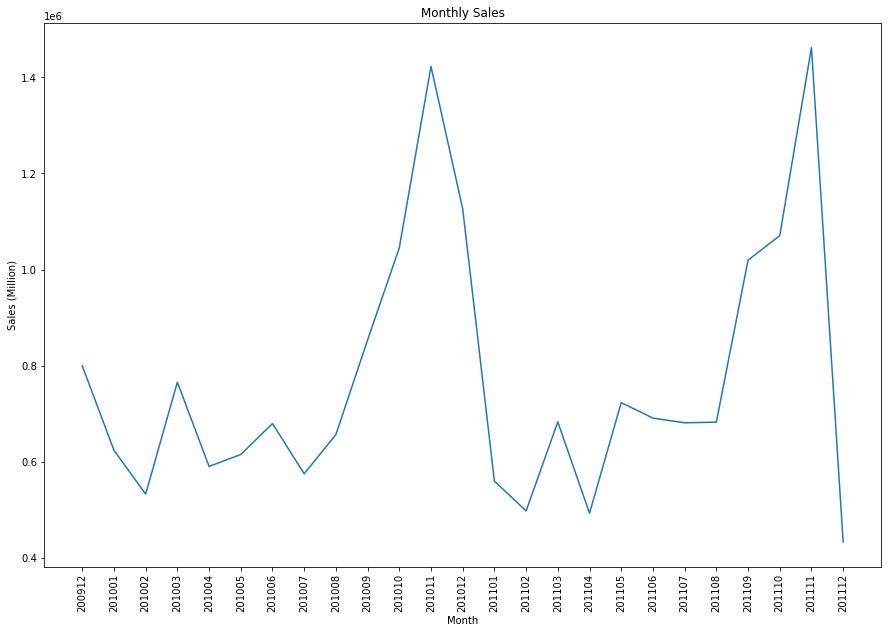

In [17]:
# Plot
plt.figure(figsize=(15,10))
plt.plot(monthly_sales_df["invoice_year_month"], monthly_sales_df["sales"])

plt.title("Monthly Sales")
plt.xlabel("Month")
plt.ylabel("Sales (Million)")

plt.xticks(rotation=90)
plt.show()

# Monthly Sales Growth


---
**Please remove this insturction cell after you are done with coding**

- Calculate monthly sales percentage growth data
- Plot a chart to show the growth percentage

![](https://i.imgur.com/J3btp8j.jpg)

---

In [18]:
monthly_sales_df["sales_growth"] = monthly_sales_df["sales"].pct_change()*100
monthly_sales_df.head()

,invoice_year_month,sales,sales_growth
0,200912,799847.110,NaN
1,201001,624032.892,-21.980978
2,201002,533091.426,-14.573185
3,201003,765848.761,43.661804
4,201004,590580.432,-22.885501


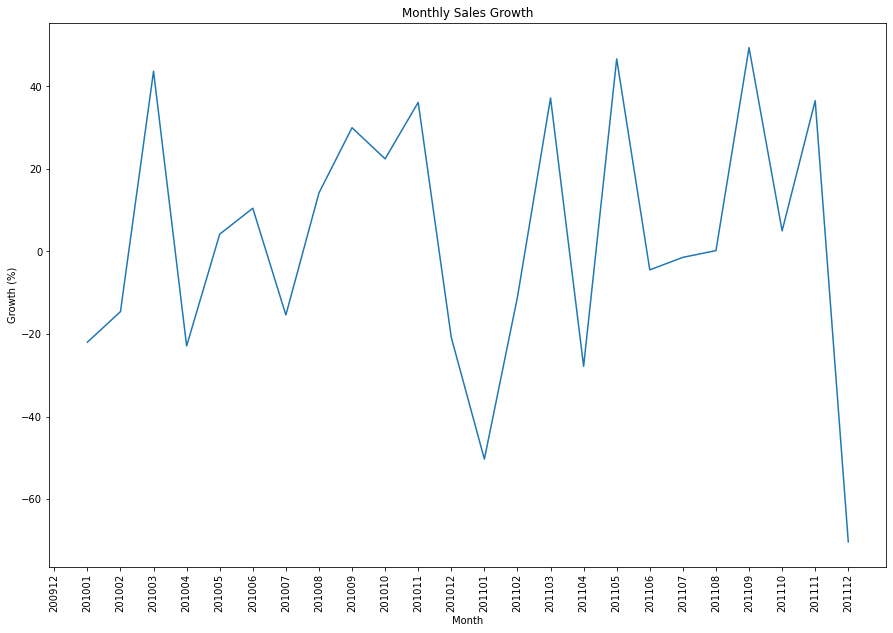

In [19]:
# Plot
plt.figure(figsize=(15,10))
plt.plot(monthly_sales_df["invoice_year_month"], monthly_sales_df["sales_growth"])

plt.title("Monthly Sales Growth")
plt.xlabel("Month")
plt.ylabel("Growth (%)")

plt.xticks(rotation=90)
plt.show()

# Monthly Active Users

In [20]:
customer_unique_df = (
    year_month_df
    .groupby('invoice_year_month')
    .customer_id
    .nunique()
    .reset_index()
    .rename(columns={'customer_id': 'count_customers'})
)
customer_unique_df.head()

,invoice_year_month,count_customers
0,200912,1045
1,201001,786
2,201002,807
3,201003,1111
4,201004,998


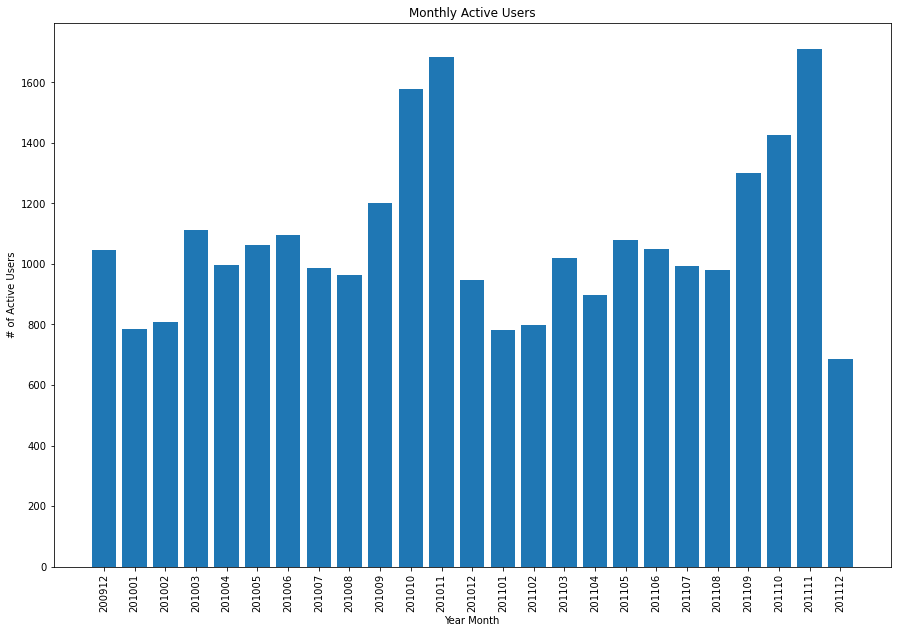

In [21]:
# Plot
plt.figure(figsize=(15,10))
plt.bar(x=customer_unique_df["invoice_year_month"], height=customer_unique_df["count_customers"])

plt.title("Monthly Active Users")
plt.xlabel("Year Month")
plt.ylabel("# of Active Users")

plt.xticks(rotation=90)
plt.show()

# New and Existing Users



In [22]:
year_month_df.sort_values("invoice_year_month")
# Find first order for each customer
first_order_df = (
    year_month_df
    .groupby(by="customer_id")["invoice_year_month"]
    .min()
    .reset_index()
)

# Group by invoice year month and merge with the customer unique df
first_order_df = (
    first_order_df
    .groupby("invoice_year_month")
    .customer_id
    .count()
    .reset_index()
    .rename(columns={'customer_id': 'new_customers'})
)

new_existing_user_df = pd.merge(customer_unique_df, first_order_df, how='left', on='invoice_year_month').rename(columns={'count_customers': 'existing_customers'})
new_existing_user_df.existing_customers = new_existing_user_df.existing_customers - new_existing_user_df.new_customers
new_existing_user_df.head()

,invoice_year_month,existing_customers,new_customers
0,200912,0,1045
1,201001,392,394
2,201002,444,363
3,201003,675,436
4,201004,707,291


<AxesSubplot:title={'center':'New and Existing Users'}, xlabel='Year Month', ylabel='Number of customer'>

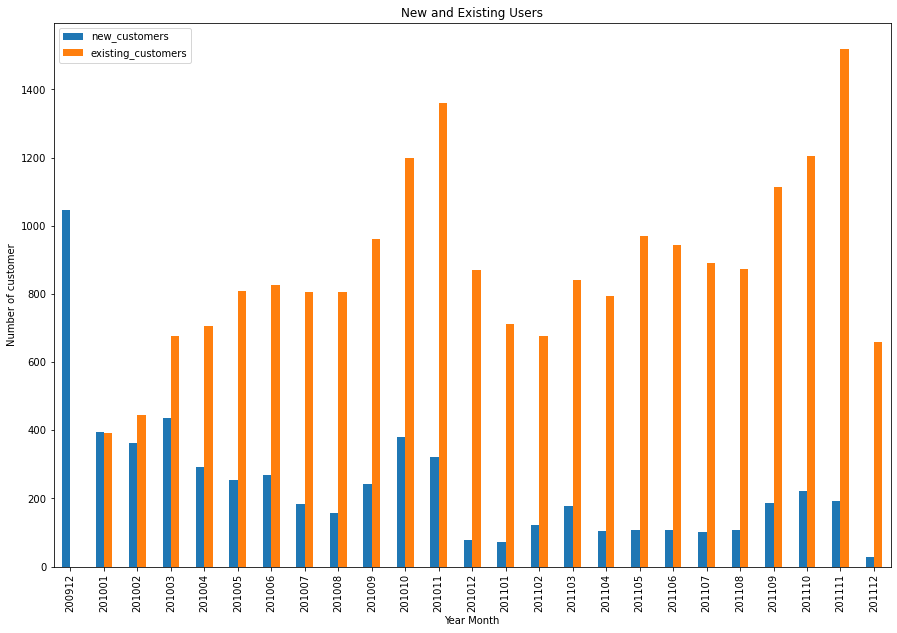

In [23]:
# Plot
new_existing_user_df.plot(
    x="invoice_year_month", 
    y=["new_customers", "existing_customers"], 
    kind="bar", 
    figsize=(15, 10), 
    title='New and Existing Users', 
    xlabel='Year Month', 
    ylabel='Number of customer'
)

## Finding RFM

RFM is a method used for analyzing customer value. It is commonly used in database marketing and direct marketing and has received particular attention in the retail and professional services industries. ([wikipedia](https://en.wikipedia.org/wiki/RFM_(market_research)))

Optional Reading: [Making Your Database Pay Off Using Recency Frequency and Monetary Analysis](http://www.dbmarketing.com/2010/03/making-your-database-pay-off-using-recency-frequency-and-monetary-analysis/)


RFM stands for three dimensions:

- Recency – How recently did the customer purchase?

- Frequency – How often do they purchase?

- Monetary Value – How much do they spend?

Note: To simplify the problem, let's keep all placed and canceled orders.

In [24]:
from datetime import datetime
recency = (
    retail_csv_df
    .groupby("customer_id")['invoice_date']
    .max()
    .reset_index()
    .rename(columns={'invoice_date': 'recency'})
)
recency.recency = (pd.Timestamp.now() - recency.recency).dt.days
recency.head()

,customer_id,recency
0,12346.0,5433
1,12347.0,5110
2,12348.0,5183
3,12349.0,5126
4,12350.0,5418


In [25]:
frequency = (
    retail_csv_df
    .groupby("customer_id")['invoice_no']
    .nunique()
    .reset_index()
    .rename(columns={'invoice_no': 'frequency'})
)
frequency.head()

,customer_id,frequency
0,12346.0,17
1,12347.0,8
2,12348.0,5
3,12349.0,5
4,12350.0,1


In [26]:
monetary =(
    invoice_line_amount_df
    .groupby("customer_id")['line_amount']
    .sum()
    .reset_index()
    .rename(columns={'line_amount': 'monetary'})
)
monetary.head()

,customer_id,monetary
0,12346.0,-64.68
1,12347.0,5633.32
2,12348.0,2019.40
3,12349.0,4404.54
4,12350.0,334.40


#### Sample RFM table

In [27]:
# Merge all tables
rfm_df = pd.merge(recency, frequency, how='inner', on='customer_id')
rfm_df = pd.merge(rfm_df, monetary, how='inner', on='customer_id')
display(rfm_df)

,customer_id,recency,frequency,monetary
0,12346.0,5433,17,-64.68
1,12347.0,5110,8,5633.32
2,12348.0,5183,5,2019.40
3,12349.0,5126,5,4404.54
4,12350.0,5418,1,334.40
...,...,...,...,...
5937,18283.0,5111,22,2736.65
5938,18284.0,5537,2,436.68
5939,18285.0,5768,1,427.00
5940,18286.0,5584,3,1188.43


# RFM Segmentation

In [28]:
# RFM score values 
rfm_df['recency_score'] = pd.qcut(rfm_df['recency'],5,labels=[5,4,3,2,1])
rfm_df['frequency_score'] = pd.qcut(rfm_df['frequency'].rank(method="first"),5,labels=[1,2,3,4,5])
rfm_df['monetary_score'] = pd.qcut(rfm_df['monetary'],5,labels=[1,2,3,4,5])
rfm_df.head()

,customer_id,recency,frequency,monetary,recency_score,frequency_score,monetary_score
0,12346.0,5433,17,-64.68,2,5,1
1,12347.0,5110,8,5633.32,5,4,5
2,12348.0,5183,5,2019.40,3,3,4
3,12349.0,5126,5,4404.54,5,3,5
4,12350.0,5418,1,334.40,2,1,2


In [29]:
# Calculation of the RFM score
rfm_df["RFM_score"] = rfm_df['recency_score'].astype(str) + rfm_df['frequency_score'].astype(str) + rfm_df['monetary_score'].astype(str)
rfm_df.head()

,customer_id,recency,frequency,monetary,recency_score,frequency_score,monetary_score,RFM_score
0,12346.0,5433,17,-64.68,2,5,1,251
1,12347.0,5110,8,5633.32,5,4,5,545
2,12348.0,5183,5,2019.40,3,3,4,334
3,12349.0,5126,5,4404.54,5,3,5,535
4,12350.0,5418,1,334.40,2,1,2,212


In [30]:
# Transposition of the RFM table. This makes it easier to evaluate.
rfm_df.describe().T

,count,mean,std,min,25%,50%,75%,max
customer_id,5942.0,15316.500000,1715.451981,12346.00,13831.2500,15316.50,16801.750,18287.00
recency,5942.0,5310.437731,211.880301,5108.00,5132.0000,5203.50,5489.000,5846.00
frequency,5942.0,7.552339,15.972262,1.00,2.0000,4.00,8.000,510.00
monetary,5942.0,2801.799459,13973.922553,-25111.09,325.0975,843.97,2182.005,598215.22


In [31]:
# Customers with RFM Score 555
rfm_df[rfm_df["RFM_score"] == "555"].head()

,customer_id,recency,frequency,monetary,recency_score,frequency_score,monetary_score,RFM_score
13,12359.0,5115,14,8714.89,5,5,5,555
16,12362.0,5111,14,5284.58,5,5,5,555
49,12395.0,5123,18,5046.92,5,5,5,555
71,12417.0,5111,27,6708.21,5,5,5,555
87,12433.0,5108,11,20428.86,5,5,5,555


In [32]:
# Customers with RFM Score 111
rfm_df[rfm_df["RFM_score"] == "111"].head()

,customer_id,recency,frequency,monetary,recency_score,frequency_score,monetary_score,RFM_score
36,12382.0,5790,1,-18.38,1,1,1,111
41,12387.0,5523,1,143.94,1,1,1,111
46,12392.0,5699,1,234.75,1,1,1,111
54,12400.0,5522,1,205.25,1,1,1,111
58,12404.0,5790,1,63.24,1,1,1,111


In [33]:
# Segmenting of customers according to RecencyScore and FrequencyScore values
seg_map = {
    r'[1-2][1-2]': 'Hibernating',
    r'[1-2][3-4]': 'At Risk',
    r'[1-2]5': 'Can\'t Lose',
    r'3[1-2]': 'About to Sleep',
    r'33': 'Need Attention',
    r'[3-4][4-5]': 'Loyal Customers',
    r'41': 'Promising',
    r'51': 'New Customers',
    r'[4-5][2-3]': 'Potential Loyalists',
    r'5[4-5]': 'Champions'
}

In [34]:
# Creation of segment variable
rfm_df['segment'] = rfm_df['recency_score'].astype(str) + rfm_df['frequency_score'].astype(str)
rfm_df['segment'] = rfm_df['segment'].replace(seg_map, regex=True)
# With "regex = True", we used the names like "need attention", "can't lose" instead of RFM scores to the data set.
rfm_df.head()

,customer_id,recency,frequency,monetary,recency_score,frequency_score,monetary_score,RFM_score,segment
0,12346.0,5433,17,-64.68,2,5,1,251,Can't Lose
1,12347.0,5110,8,5633.32,5,4,5,545,Champions
2,12348.0,5183,5,2019.40,3,3,4,334,Need Attention
3,12349.0,5126,5,4404.54,5,3,5,535,Potential Loyalists
4,12350.0,5418,1,334.40,2,1,2,212,Hibernating


In [35]:
rfm_df[["segment", "recency","frequency","monetary"]].groupby("segment").agg(["mean","count"])

recency        frequency            monetary      
                            mean count       mean count          mean count
segment                                                                    
About to Sleep       5215.671053   380   1.460526   380    492.810900   380
At Risk              5484.065160   752   4.672872   752   1157.449162   752
Can't Lose           5429.258824    85  17.717647    85   5725.638494    85
Champions            5115.498832   856  23.532710   856  10510.937634   856
Hibernating          5573.222801  1535   1.336808  1535    340.030536  1535
Loyal Customers      5175.121739  1150  11.941739  1150   3966.024762  1150
Need Attention       5221.380952   273   3.673993   273   1099.877403   273
New Customers        5117.814815    54   1.000000    54    362.463148    54
Potential Loyalists  5132.659919   741   2.967611   741    899.359865   741
Promising            5145.758621   116   1.000000   116    322.758966   116

## Remark: 

3 segments selected for evaluation are "Can't Lose", "Hibernating" and "Champions".

Number of customers for segments:

Can't Lose = 85, Hibernating = 1535, Champions = 856


- Can't Lose Segment;

    - The last shopping date of the customers is on average 5429 days before.
    - Customers have made an average of 18 purchases.
    - Customers spent an average of £ 5726.


- Hibernating Segment;

    - The last shopping date of the customers is 5573 days before average.
    - Customers made an average of 1 purchases.
    - Customers spent an average of £ 340.


- Champions Segment;

    - The last shopping date of the customers is 5115 days before average.
    - Customers made an average of 24 purchases.
    - Customers spent an average of £ 10511.


- Can't Lose Segment;

    - Customers in this segment have not recently made a purchase. For this reason, we need to prepare a discount and gift campaign for this segment. These customers made a large number of purchases when they made purchases before. However, recency values are lower than they should be. The campaign to be implemented for these customers should include both items purchased and recommendations based on previous activities. New and popular products associated with the products that they were interested in can also be included in this campaign. Situations that will cause these customers to stop buying need to be investigated.


- Hibernating Segment;

    - Customers in this segment have not made a purchase for a long time. However, by offering discounts, they may be attracted to another purchase.


- Champions Segment;

    - Customers in this segment are responsible for most of the revenue. Campaigns should be implemented to ensure the continuity of the shopping of these customers.